# Homework 6

In this homework we will
1. Use `sklearn`'s **`SVC`** class to perform non-linear SVM classification 
2. Use `sklearn`'s `cross_val_score` and `GridSearchCV` functions to perform cross validation and hyper-parameter tunning.
3. Reconstruct the classification boundary given  `sklearn`  provide support vectors. 


## Preliminaries

### Imports

<div class="alert alert-block alert-info"> Problem 0 </div>
This time you will need to **add any other necessary  import statements** yourself.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

import sys
sys.path.append("../..")
import E4525_ML.samples as samples

### Random Seed

In [2]:
seed=4543
np.random.seed(seed)

### Sample Data Generation

In [3]:
N=40
X,Y=samples.ellipsoid(N//2)
X_test,Y_test=samples.ellipsoid(N//2)

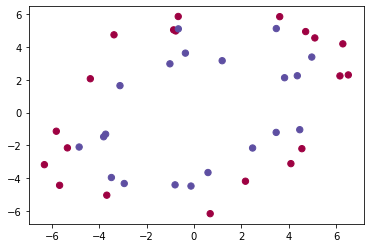

In [4]:
plt.scatter(X[:,0],X[:,1],c=Y, s=40, cmap=plt.cm.Spectral)

## Polinomial features

<div class="alert alert-block alert-info"> Problem 1.0 </div>
Greate a function **`phi`**, that, given input $ N\times 2$ array $X$ generates  $N \times 5$ array $Z$
with all monomials in $X$ at to second order, i.e. with the  columns

$$
        X_1, X_2, X_1^2, X_1 X_2, X_2^2
$$


In [11]:
def phi(X):
    row=X.shape[0]
    Z=[[0 for i in range(5)] for j in range(row)]
    for i in range(row):
        Z[i][0]=X[i][0]
        Z[i][1]=X[i][1]
        Z[i][2]=X[i][0]**2
        Z[i][3]=X[i][0]*X[i][1]
        Z[i][4]=X[i][1]**2
    return Z

<div class="alert alert-block alert-info"> Problem 1.1 </div>
Generate feature arrays `Z` and `Z_test` with all monomial at to second order for the training data `X` and the test data `X_test` 

In [12]:
Z=phi(X)
Z_test=phi(X_test)

In [18]:
len(Z), len(X)

(40, 40)

In [19]:
len(Z_test), len(X_test)

(40, 40)

## Linear SVM

<div class="alert alert-block alert-info"> Problem 2.0 </div>
using `sklearn`'s  function `model_validation.cross_val_score` and `sklearn`'s `svm.SVC` estimator (classifier) compute the average 10-Fold cross validation error of a **linear** svm model fitted to the transformed feature data `Z`.

[HINT] You need to import any `sklearn` modules or functions you want use.

In [21]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [25]:
model1=svm.SVC(kernel='linear')
scores=cross_val_score(model1, Z, Y, cv=10)
print('The avg 10-fold cross validation score is: ', np.average(scores))

The avg 10-fold cross validation score is:  0.9


<div class="alert alert-block alert-info"> Problem 2.1 </div>
fit the SVC estimator to the transformed training data `Z`.
After fitting the model, compute the number of support vectors

[HINT] After fitting, Support vectors are stored into the model's variable `support_vectors_`.

Look into [SVC documentation](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), specially the **Attributes** section  for information on available results returned by the classifier.

In [29]:
model1.fit(Z, Y)
num_sv=len(model1.support_vectors_)
print('The number of support vector is: ', num_sv)

The number of support vector is:  8


<div class="alert alert-block alert-info"> Problem 2.2 </div>
Show that the fitted estimator contains a variable `C` with the value of $C$ it was initialized with 

In [30]:
model1.C

1.0

In [31]:
print('The value of C is: ', model1.C)

The value of C is:  1.0


<div class="alert alert-block alert-info"> Problem 2.3 </div>
Using the function [`model_selection.GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)
select by 10-fold cross validation the optimal value of C to use while fitting a  SVC linear model with the transformed training data `Z`.

Display clearly the optimal value of C, and the number of support vectors of the best model

[HINT] 

1. Read the  [`model_selection.GridSearchCV` ](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)        documentation carefully
2. Parameters to search over are passed in the `parameters`'s  **dictionary**   argument of `GridSearchCV`
3. The number of folds is controled by the argument  `cv`
4. Consider only the values of $C$ provided below
5. The GridSearchCV object, after fitting, contains a variable **`best_estimator_`** with the best calibrated model. You can get 
   from the best estimator $C$ and the array of support vectors.

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
Cs=[0.001,0.01,0.1,1,10,100,1000,10000]
parameters={'C':Cs}

In [34]:
svc = svm.SVC(kernel='linear')
gcv=GridSearchCV(svc, parameters, cv=10)
gcv.fit(Z, Y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [36]:
gcv.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [78]:
svc_best=gcv.best_estimator_
svc_best.fit(Z, Y)
print('The value of C is: ', 0.1)
print('The number of support vectors are: ', len(svc_best.support_vectors_))

The value of C is:  0.1
The number of support vectors are:  9


<div class="alert alert-block alert-info"> Problem 2.4 </div>
Compute the 10-fold cross validation accuracy of the best estimator using `sklearn` `cross_val_score` function

In [79]:
scores=cross_val_score(svc_best,Z,Y,cv=10)
np.mean(scores)

0.95

<div class="alert alert-block alert-info"> Problem 2.5 </div>
Show the class Y for each support vector

[HINT] after fitting the estimator  contains an boolean array `support_` that is set true for the index of data points that are support vectors

In [83]:
index=svc_best.support_
predict_value=svc_best.predict(Z)
predict_sv=predict_value[index]
Y_sv=Y[index]

In [84]:
print('The predicted value of support vectors are: ', Y_sv)

The predicted value of support vectors are:  [0 0 0 0 0 1 1 1 1]


<div class="alert alert-block alert-info"> Problem 2.6 </div>
Show that
$$
    \sum_i \alpha_i y_i =0
$$
where $y_i=-1$ for the negative class and $y_i=+1$ for the positive class
[HINT] 
1. Our input classes are y={0,1}, but `SVC` internally treats them as if they were y=(-1,1)
2. The fitted estimator contains an array **`dual_coef_`** that contains the values of $\alpha_i y_i$
3. `dual_coef_` is a $1 x N$ array, it may be easier for the rest of this notebook to turn in into a $N$ array by using
    `ravel()` method.


In [85]:
dual_coef=svc_best.dual_coef_.ravel()

In [86]:
sum_dual_coef=sum(dual_coef)
print('The sum of dual coefficient is: ', sum_dual_coef)
print('Which is very closed to 0.')

The sum of dual coefficient is:  2.7755575615628914e-17
Which is very closed to 0.


<div class="alert alert-block alert-info"> Problem 2.7 </div>
Show wich support vectors are in violation of the margin

[HINT]
Remember that support vectors in violation of the marging satisfy
$$
    \alpha_i = C
$$
But that `SVC` returned 

$$
    \textrm{dual_coef}_i = \alpha_i y_i
$$

In [96]:
violation=np.abs(dual_coef)==0.1
violation

array([False, False,  True, False, False, False,  True,  True,  True])

In [58]:
print('The 3rd, 7th, 8th and the 9th support vectors are in violation of the margin.')

The 7th and the 9th support vectors are in violation of the margin.


<div class="alert alert-block alert-info"> Problem 2.8 </div>
Using equation
$$
    w_d = \sum_i \alpha_i y_i x_{i,d}
$$
compute the vector of loadings $w$

In [64]:
dual_coef

array([-0.0745366 , -0.03340815, -0.1       , -0.09613701, -0.02785635,
        0.03193811,  0.1       ,  0.1       ,  0.1       ])

In [92]:
w=np.dot(svc_best.support_vectors_.T,dual_coef)
w

array([ 0.14682956,  0.06861315, -0.37866999,  0.25213885, -0.37136477])

<div class="alert alert-block alert-info"> Problem 2.9 </div>
Select a support vector not in violation of the margin and use the equation

$$
    y_i(w^T x + b) =1
$$
to compute $b$

In [94]:
sv=svc_best.support_vectors_[0]
sv

array([ 4.71747825,  4.93114745, 22.25460101, 23.26258084, 24.3162152 ])

In [142]:
b=-1- np.dot(w.T,sv)
b

9.56092798354063

<div class="alert alert-block alert-info"> Problem 2.10 </div>
Write a prediction function that classifies poinst as having class $y=0$ or $y=1$ in terms of $w$ and $b$

Use this class to classify all points in the training set and verify that the accuracy of your function is exactly the same as  the
accuracy of the `predict` method of the best estimator.

In [154]:
def prediction(x, w, b):
    return (np.sign(np.dot(x, w)+b)+1)/2

In [155]:
y_pred=prediction(Z, w, b)
np.mean(y_pred==Y)

0.975

In [157]:
best_pred=svc_best.predict(Z)
np.mean(best_pred==Y)

0.975

In [158]:
print('They have the same accuracy.')

They have the same accuracy.


## Polinomial Kernel

<div class="alert alert-block alert-info"> Problem 3.1 </div>
using sklearn's function model_validation.cross_val_score and sklearn's svm.SVC estimator (classifier) compute the average 10-Fold cross validation error of a linear svm model to the **polinomial** kernel and the **untransformed** training data $X$,$Y.

Set the polinomial kernel to be
$$
    K(x,x') = (1 + x^T x')^2
$$

[HINT] 
1. `SVC` implement the following parametrization of the polynomial kernel
$$
    K(x,x') = ( c + \gamma x^T x')^d
$$
where $c$ is the parameter `coef0` of `SVC`'s constructor and $\gamma$ is the `gamma` parameter, and $d$ is the `degree` parameter.

2. You may want to review again the [SVC documentation](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) 

In [160]:
model2=svm.SVC(kernel="poly", coef0=1, gamma=1, degree=2)

scores=cross_val_score(model2,X,Y,cv=10)
np.average(scores)

0.9

In [161]:
print('The 10-Fold cross validation score of polinomial kernel is 0.9 ')

The 10-Fold cross validation score of polinomial kernel is 0.9 


<div class="alert alert-block alert-info"> Problem 3.2 </div>
Using the function [`model_selection.GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)
select by 10-fold cross validation the optimal values of $C$ and $\gamma$ to use while fitting a  SVC polynomial kernel with the untransformed training data `X`. Keep the constant $c$ (`coef0`) fixed at 1.

Display clearly the optimal values of $C$ and $\gamma$, and the number of support vectors of the best model

[HINT] 

1. Read the  [`model_selection.GridSearchCV` ](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)        documentation carefully
2. Parameters to search over are passed in the `parameters`'s  **dictionary**   argument of `GridSearchCV`
3. The number of folds is controled by the argument  `cv`
4. Consider only the values of $C$ and $\gamma$ provided below
5. The GridSearchCV object, after fitting, contains a variable **`best_estimator_`** with the best calibrated model. You can get 
   from the values of best estimator's $C$  and $\gamma$ parameters and the array of support vectors.
6. As the search may be a bit time consuming, it may be useful so set the `GridSearchCV` verbose parameter so that you can see if the search is making progress.

In [162]:
Cs=[0.001,0.01,0.1,1,10,100]
gammas=[0.01,0.1,1,10,100]

parameters={'C':Cs, 'gamma':gammas}

In [165]:
gcv=GridSearchCV(model2, parameters, cv=10)
gcv.fit(X, Y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=1,
                           decision_function_shape='ovr', degree=2, gamma=1,
                           kernel='poly', max_iter=-1, probability=False,
                           random_state=None, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [166]:
gcv.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=2, gamma=1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [167]:
print('The best C is 0.1, the gamma is 1')

The best C is 0.1, the gamma is 1


<div class="alert alert-block alert-info"> Problem 3.3 </div>
Show the class Y for each support vector

[HINT] after fitting the estimator  contains an boolean array `support_` that is set true for the index of data points that are support vectors

In [168]:
svc_2=gcv.best_estimator_

In [169]:
index=svc_2.support_
Y[index]

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1], dtype=uint8)

<div class="alert alert-block alert-info"> Problem 3.4 </div>
Show that
$$
    \sum_i \alpha_i y_i =0
$$
where $y_i=-1$ for the negative class and $y_i=+1$ for the positive class


In [173]:
dual_coef2=svc_2.dual_coef_.ravel()
np.sum(dual_coef2)

0.0

In [174]:
print('The sum of dual coefficient is 0')

The sum of dual coefficient is 0


<div class="alert alert-block alert-info"> Problem 3.5 </div>
Show which support vectors are in violation of the margin


In [176]:
vio2= np.abs(alpha)==svc_2.C
print(vio2)

[False False False False False False  True False  True]


In [177]:
print('The seventh and the last are the vectors that are in violation')

The seventh and the last are the vectors that are in violation


<div class="alert alert-block alert-info"> Problem 3.6 </div>
Write a function that, give two matrices $X_{i,d}$, $X'_{j,d}$ for $i=1,\dots,N_1$, $j=1,\dots,N_2$ and $d=1,\dots D$
computes the kernel products
$$
    K_{i,j} = \textrm{kernel}(X_i,X'_j)
$$
where 'kernel' is the optimal kernel you found by cross-validation

In [185]:
def kernel_product(X, X_, gamma):
    return (gamma*np.dot(X,X_.T)+1)**2

<div class="alert alert-block alert-info"> Problem 3.7 </div>
Write a prediction function that classifies points as having class $y=0$ or $y=1$ in terms of $\alpha$, $b$, and the support vectors, using equation

$$
  y(x) =  \frac{\textrm{sign}( \sum_i \alpha_i y_i K(x,x_i) + b ) + 1}{2}
$$

Use this class to classify all points in the training set and verify that the accuracy of your function is exactly the same as  the
accuracy of the `predict` method of the best estimator.

In [220]:
def predict_2(x,support_vectors,alpha,b):
    pred=np.dot(alpha,kernel_product(support_vectors,x, svc_2.gamma))+b
    return (np.sign(pred)+1)/2

In [221]:
v=svc_2.support_vectors_[0]
v=v.reshape(1,len(v))
b=-1-np.dot(dual_coef2,kernel_product(svc_2.support_vectors_,v, svc_2.gamma))
b

array([10.4469308])

In [222]:
p_1=predict_2(X, svc_2.support_vectors_, dual_coef2, b)

In [223]:
np.average(p_1==Y)

0.975

In [224]:
Y_pred=svc_2.predict(X)
np.mean(Y_pred==Y)

0.975

<div class="alert alert-block alert-info"> Problem 3.8 </div>
Use the function `decision_boundary_2d` from the python module `E4525_ML.plots` to display a graph of the training points and 
the optimal estimator descision boundary.

In [229]:
import matplotlib.pyplot as plt
import E4525_ML.plots as plots

(12544, 2) (40,) (12544,)


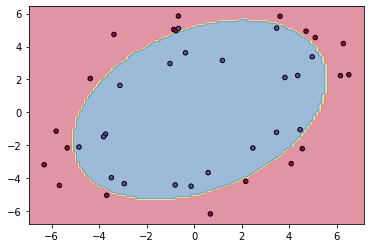

In [231]:
fig=plt.figure()
ax=fig.gca()
plots.decision_boundary_2d(svc_2,X,Y,ax)